In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
import pylab
import numpy as np

In [2]:
inflation_rate1=pd.read_excel("Inflation_rate_of_india.xlsx",header=0,index_col=0,parse_dates=True)
inflation_rate1

,Inflation Rate (%)
Year,
2022-01-01,0.0490
2021-01-01,0.0560
2020-01-01,0.0662
2019-01-01,0.0372
2018-01-01,0.0395
...,...
1964-01-01,0.1336
1963-01-01,0.0295
1962-01-01,0.0363


In [3]:
inflation_rate_data=inflation_rate1.rename({"Inflation Rate (%)":"Rate"},axis=1)

In [4]:
inflation_rate_data

,Rate
Year,
2022-01-01,0.0490
2021-01-01,0.0560
2020-01-01,0.0662
2019-01-01,0.0372
2018-01-01,0.0395
...,...
1964-01-01,0.1336
1963-01-01,0.0295
1962-01-01,0.0363


In [5]:
inflation_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2022-01-01 to 1960-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    63 non-null     float64
dtypes: float64(1)
memory usage: 1008.0 bytes


In [6]:
inflation_rate_data.isnull().sum()

Rate    0
dtype: int64

<AxesSubplot:xlabel='Rate'>

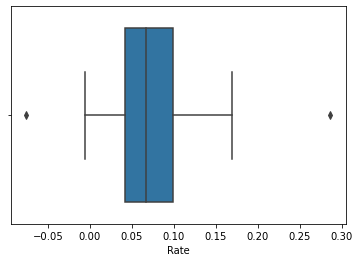

In [7]:
import seaborn as sns
sns.boxplot(inflation_rate_data['Rate'])

In [8]:
mean =inflation_rate_data.mean()
mean

Rate    0.073573
dtype: float64

In [9]:
# Finding the Boundary Values
print("Highest allowed",inflation_rate_data['Rate'].mean() + 3*inflation_rate_data['Rate'].std())
print("Lowest allowed",inflation_rate_data['Rate'].mean() - 3*inflation_rate_data['Rate'].std())

Highest allowed 0.22011860258982946
Lowest allowed -0.07297257084379762


In [10]:
#Finding the Outliers
inflation_rate_data[(inflation_rate_data['Rate'] >  0.2201186025898294) | (inflation_rate_data['Rate'] < -0.0729725708437977)]


,Rate
Year,
1976-01-01,-0.0763
1974-01-01,0.2860


In [11]:
inflation_rate_data["Rate"] = np.where(inflation_rate_data["Rate"] >0.2201186025898294, mean,inflation_rate_data['Rate'])

In [12]:
inflation_rate_data["Rate"] = np.where(inflation_rate_data["Rate"] <-0.0729725708437977, mean,inflation_rate_data['Rate'])

In [13]:
inflation_rate_data

,Rate
Year,
2022-01-01,0.0490
2021-01-01,0.0560
2020-01-01,0.0662
2019-01-01,0.0372
2018-01-01,0.0395
...,...
1964-01-01,0.1336
1963-01-01,0.0295
1962-01-01,0.0363


<AxesSubplot:xlabel='Rate'>

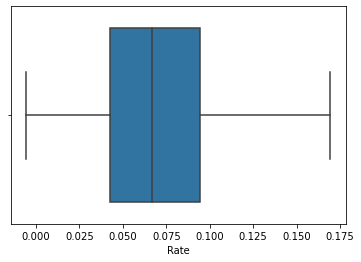

In [14]:
sns.boxplot(inflation_rate_data['Rate'])

In [15]:
inflation_rate=inflation_rate_data.sort_values(by=["Year"])

inflation_rate

,Rate
Year,
1960-01-01,0.0178
1961-01-01,0.0170
1962-01-01,0.0363
1963-01-01,0.0295
1964-01-01,0.1336
...,...
2018-01-01,0.0395
2019-01-01,0.0372
2020-01-01,0.0662


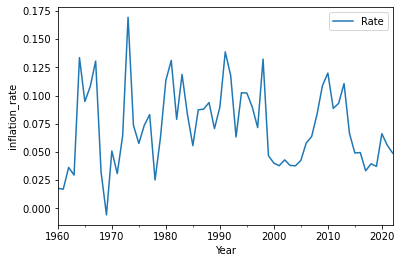

In [16]:
inflation_rate.plot()                       #Line Plot Of Our Data To check Stationarity And Trends
plt.ylabel("inflation_rate")
pyplot.show()
pylab.rcParams['figure.figsize'] = (10,7)

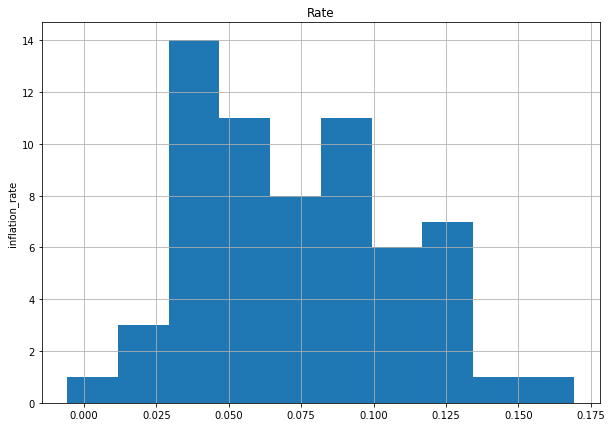

In [17]:
inflation_rate.hist()                         # Histogram To check Distribution
plt.ylabel("inflation_rate")
pyplot.show()
pylab.rcParams['figure.figsize'] = (10,7)

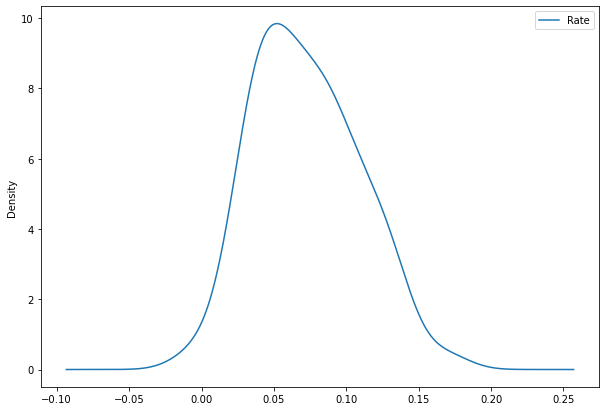

In [18]:
inflation_rate.plot(kind="kde") 
pylab.rcParams['figure.figsize'] = (9,7)

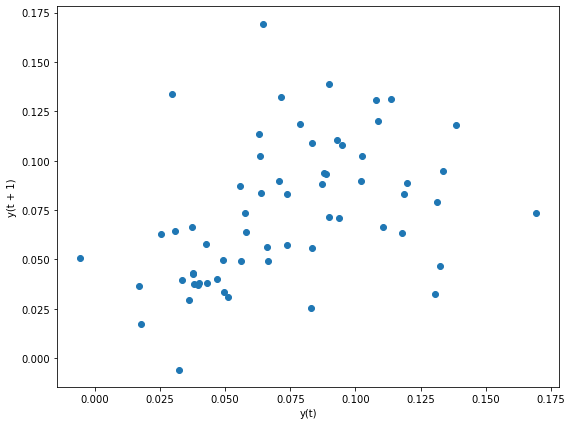

In [19]:
from  pandas.plotting import lag_plot
lag_plot(inflation_rate)
pylab.rcParams['figure.figsize'] = (9,7)

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

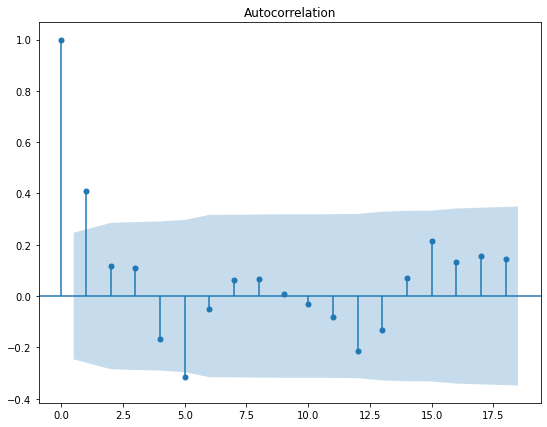

In [21]:
plot_acf(inflation_rate)
pyplot.show()
pylab.rcParams['figure.figsize'] = (10,7)

In [22]:
upsampled = inflation_rate.resample('M').mean()
print(upsampled.head(50))

              Rate
Year              
1960-01-31  0.0178
1960-02-29     NaN
1960-03-31     NaN
1960-04-30     NaN
1960-05-31     NaN
1960-06-30     NaN
1960-07-31     NaN
1960-08-31     NaN
1960-09-30     NaN
1960-10-31     NaN
1960-11-30     NaN
1960-12-31     NaN
1961-01-31  0.0170
1961-02-28     NaN
1961-03-31     NaN
1961-04-30     NaN
1961-05-31     NaN
1961-06-30     NaN
1961-07-31     NaN
1961-08-31     NaN
1961-09-30     NaN
1961-10-31     NaN
1961-11-30     NaN
1961-12-31     NaN
1962-01-31  0.0363
1962-02-28     NaN
1962-03-31     NaN
1962-04-30     NaN
1962-05-31     NaN
1962-06-30     NaN
1962-07-31     NaN
1962-08-31     NaN
1962-09-30     NaN
1962-10-31     NaN
1962-11-30     NaN
1962-12-31     NaN
1963-01-31  0.0295
1963-02-28     NaN
1963-03-31     NaN
1963-04-30     NaN
1963-05-31     NaN
1963-06-30     NaN
1963-07-31     NaN
1963-08-31     NaN
1963-09-30     NaN
1963-10-31     NaN
1963-11-30     NaN
1963-12-31     NaN
1964-01-31  0.1336
1964-02-29     NaN


In [23]:
inflation_rate2 = upsampled.interpolate(method='linear')
print(inflation_rate2.head(32))
inflation_rate2.info()

                Rate
Year                
1960-01-31  0.017800
1960-02-29  0.017733
1960-03-31  0.017667
1960-04-30  0.017600
1960-05-31  0.017533
1960-06-30  0.017467
1960-07-31  0.017400
1960-08-31  0.017333
1960-09-30  0.017267
1960-10-31  0.017200
1960-11-30  0.017133
1960-12-31  0.017067
1961-01-31  0.017000
1961-02-28  0.018608
1961-03-31  0.020217
1961-04-30  0.021825
1961-05-31  0.023433
1961-06-30  0.025042
1961-07-31  0.026650
1961-08-31  0.028258
1961-09-30  0.029867
1961-10-31  0.031475
1961-11-30  0.033083
1961-12-31  0.034692
1962-01-31  0.036300
1962-02-28  0.035733
1962-03-31  0.035167
1962-04-30  0.034600
1962-05-31  0.034033
1962-06-30  0.033467
1962-07-31  0.032900
1962-08-31  0.032333
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 1960-01-31 to 2022-01-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    745 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [24]:
inflation_rate2.head()

,Rate
Year,
1960-01-31,0.017800
1960-02-29,0.017733
1960-03-31,0.017667
1960-04-30,0.017600
1960-05-31,0.017533


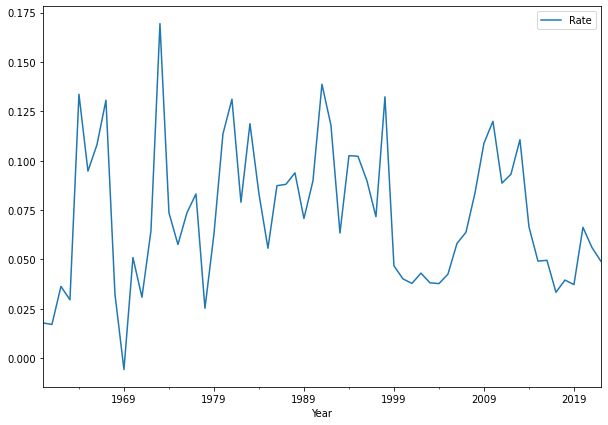

In [25]:
inflation_rate2.plot()
pyplot.show()
pylab.rcParams['figure.figsize'] = (10,7)

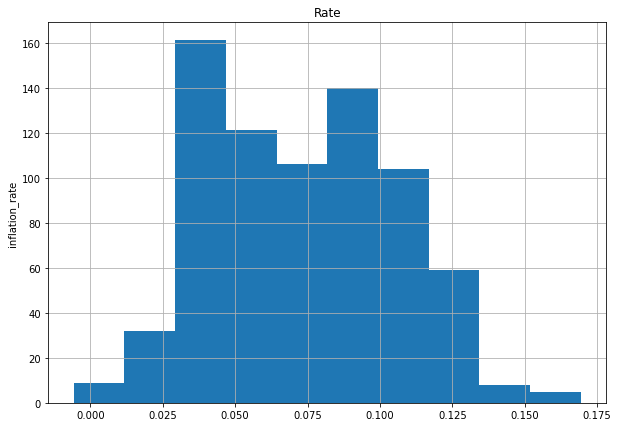

In [26]:
inflation_rate2.hist()                             # Histogram Of Interpolated Data
plt.ylabel("inflation_rate")
pyplot.show()
pylab.rcParams['figure.figsize'] = (10,7)

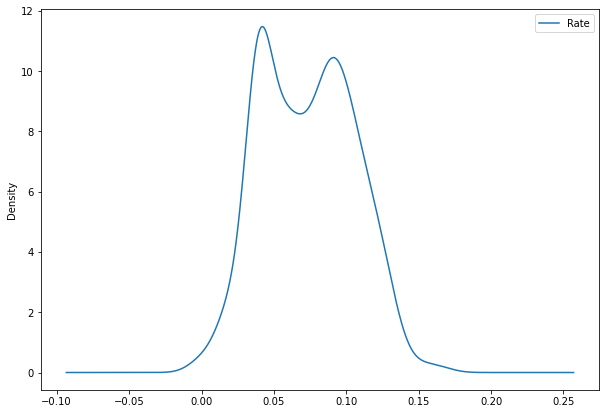

In [27]:
inflation_rate2.plot(kind="kde")
pylab.rcParams['figure.figsize'] = (9,5)

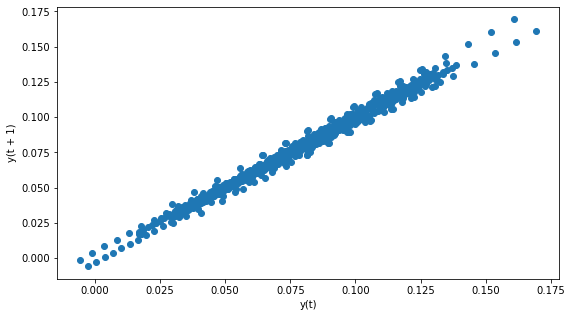

In [28]:
lag_plot(inflation_rate2)                      #Lag_Plot of Interpolated Data 
pyplot.show()
pylab.rcParams['figure.figsize'] = (10,7)

In [29]:
inflation_rate2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 1960-01-31 to 2022-01-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    745 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


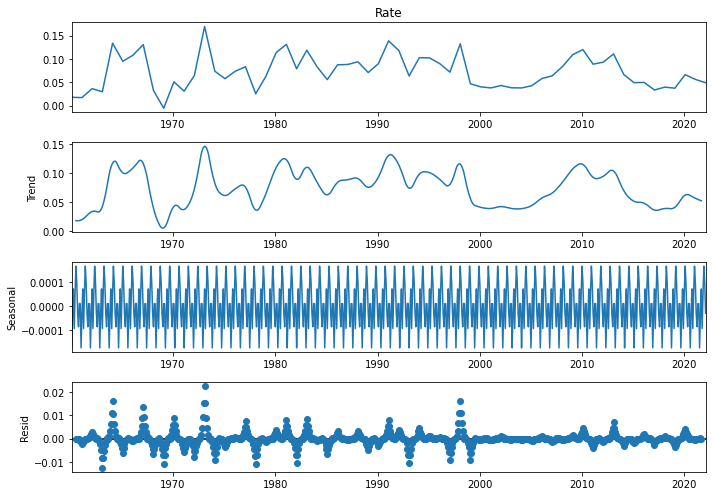

In [30]:
import statsmodels.api as smf
seasonal_ts_add=smf.tsa.seasonal_decompose(inflation_rate2["Rate"],freq=11)
seasonal_ts_add.plot()
plt.show()
pylab.rcParams['figure.figsize'] = (10,7)

In [31]:
inflation_rate2

,Rate
Year,
1960-01-31,0.017800
1960-02-29,0.017733
1960-03-31,0.017667
1960-04-30,0.017600
1960-05-31,0.017533
...,...
2021-09-30,0.051333
2021-10-31,0.050750
2021-11-30,0.050167


In [32]:
inflation_rate3=inflation_rate2.copy()

In [33]:
inflation_rate3.reset_index(level=0, inplace=True)

In [34]:
inflation_rate3

,Year,Rate
0,1960-01-31,0.017800
1,1960-02-29,0.017733
2,1960-03-31,0.017667
3,1960-04-30,0.017600
4,1960-05-31,0.017533
...,...,...
740,2021-09-30,0.051333
741,2021-10-31,0.050750
742,2021-11-30,0.050167
743,2021-12-31,0.049583


In [35]:
inflation_rate3["month"]=pd.to_datetime(inflation_rate3["Year"], format="%Y").dt.strftime('%b')

In [36]:
inflation_rate3

,Year,Rate,month
0,1960-01-31,0.017800,Jan
1,1960-02-29,0.017733,Feb
2,1960-03-31,0.017667,Mar
3,1960-04-30,0.017600,Apr
4,1960-05-31,0.017533,May
...,...,...,...
740,2021-09-30,0.051333,Sep
741,2021-10-31,0.050750,Oct
742,2021-11-30,0.050167,Nov
743,2021-12-31,0.049583,Dec


In [37]:
month_dummies = pd.DataFrame(pd.get_dummies(inflation_rate3['month']))
month_dummies 

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
740,0,0,0,0,0,0,0,0,0,0,0,1
741,0,0,0,0,0,0,0,0,0,0,1,0
742,0,0,0,0,0,0,0,0,0,1,0,0
743,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
inflation_rate4 = pd.concat([inflation_rate3,month_dummies],axis = 1)
inflation_rate4.head()

,Year,Rate,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1960-01-31,0.017800,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1960-02-29,0.017733,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1960-03-31,0.017667,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1960-04-30,0.017600,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1960-05-31,0.017533,May,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:

inflation_rate4["t"] = np.arange(1,746)
inflation_rate4["t_squared"] = inflation_rate4["t"]*inflation_rate4["t"]
inflation_rate4["log_Rate"] = np.log(inflation_rate4["Rate"])
inflation_rate4.columns
inflation_rate4.head()

,Year,Rate,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Rate
0,1960-01-31,0.017800,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,-4.028557
1,1960-02-29,0.017733,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,-4.032309
2,1960-03-31,0.017667,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,-4.036076
3,1960-04-30,0.017600,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,-4.039856
4,1960-05-31,0.017533,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,-4.043651


In [40]:
Train = inflation_rate4.head(600)
Test = inflation_rate4.tail(145)

In [41]:
import statsmodels.formula.api as smf 
#Linear Model
linear_model = smf.ols('Rate~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Rate'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  0.029792835605417588


In [42]:
#Exponential
Exp = smf.ols('log_Rate~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Rate'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  0.031618392756188045


In [43]:
#Quadratic
Quad = smf.ols('Rate~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Rate'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  0.03287603184796575


In [44]:
#Additive seasonality 
add_sea = smf.ols('Rate~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Rate'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  0.027009177188729538


In [45]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Rate~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Rate'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 0.03291710682345731


In [46]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Rate~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Rate'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)


RMSE Multiplicative Seasonality: 0.02485985848747382


In [47]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Rate~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Rate'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )


RMSE Multiplicative Additive Seasonality: 0.03168173236903817


In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [49]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [50]:
ses_model = SimpleExpSmoothing(Train["Rate"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
ses_model_rmse=rmse(pred_ses,Test.Rate)
ses_model_rmse

0.05600210128045732

In [51]:
# Holt method 
hw_model = Holt(Train["Rate"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
hw_model_rmse=rmse(pred_hw,Test.Rate) 
hw_model_rmse

0.1430806383086555

In [52]:
hwe_model_add_add = ExponentialSmoothing(Train["Rate"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
hwe_model_add_add_rmse=rmse(pred_hwe_add_add,Test.Rate)
hwe_model_add_add_rmse

0.12724104708605996

In [53]:
#Compare the results
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","ses_model_rmse","hw_model_rmse","hwe_model_add_add_rmse"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,ses_model_rmse,hw_model_rmse,hwe_model_add_add_rmse])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,0.029793
1,rmse_Exp,0.031618
2,rmse_Quad,0.032876
3,rmse_add_sea,0.027009
4,rmse_add_sea_quad,0.032917
5,rmse_Mult_sea,0.024860
6,rmse_Mult_add_sea,0.031682
7,ses_model_rmse,0.056002
8,hw_model_rmse,0.143081
9,hwe_model_add_add_rmse,0.127241


# Model Building using ARIMA

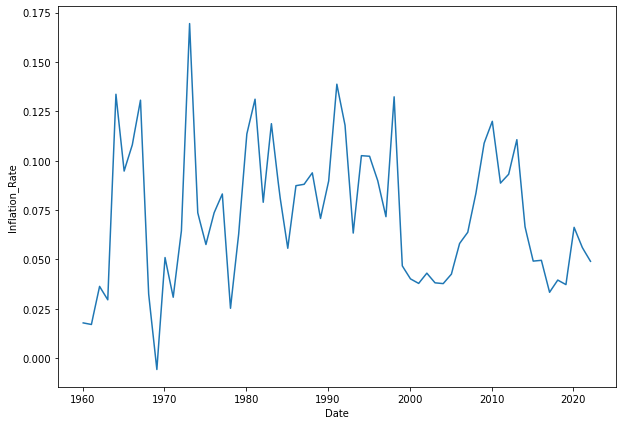

In [54]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Inflation_Rate')
plt.plot(inflation_rate2)
pylab.rcParams['figure.figsize'] = (9,4)

In [55]:
#Determine rolling statistics
rolmean = inflation_rate2.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = inflation_rate2.rolling(window=12).std()
print(rolmean,rolstd)

                Rate
Year                
1960-01-31       NaN
1960-02-29       NaN
1960-03-31       NaN
1960-04-30       NaN
1960-05-31       NaN
...              ...
2021-09-30  0.054675
2021-10-31  0.054025
2021-11-30  0.053397
2021-12-31  0.052792
2022-01-31  0.052208

[745 rows x 1 columns]                 Rate
Year                
1960-01-31       NaN
1960-02-29       NaN
1960-03-31       NaN
1960-04-30       NaN
1960-05-31       NaN
...              ...
2021-09-30  0.002305
2021-10-31  0.002211
2021-11-30  0.002141
2021-12-31  0.002103
2022-01-31  0.002103

[745 rows x 1 columns]


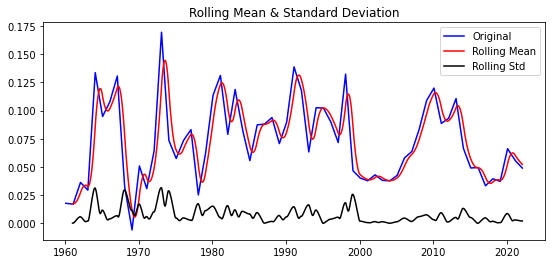

In [56]:
#Plot rolling statistics
orig = plt.plot(inflation_rate2, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
pylab.rcParams['figure.figsize'] = (16,7)

## Perform Augmented Dickey–Fuller test:

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(inflation_rate2['Rate'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -4.636436
p-value                          0.000111
#Lags Used                      13.000000
Number of Observations Used    731.000000
Critical Value (1%)             -3.439327
Critical Value (5%)             -2.865502
Critical Value (10%)            -2.568880
dtype: float64


## Data Transformation to achieve Stationarity 

In [59]:
inflation_rate2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 1960-01-31 to 2022-01-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    745 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [60]:
#Estimating trend by taking log transformation
indexedDataset_logScale = np.log(inflation_rate2)

indexedDataset_logScale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 1960-01-31 to 2022-01-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    742 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [61]:
indexedDataset_logScale['Rate']=indexedDataset_logScale['Rate'].fillna(indexedDataset_logScale['Rate'].mean())

In [62]:
indexedDataset_logScale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 1960-01-31 to 2022-01-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    745 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


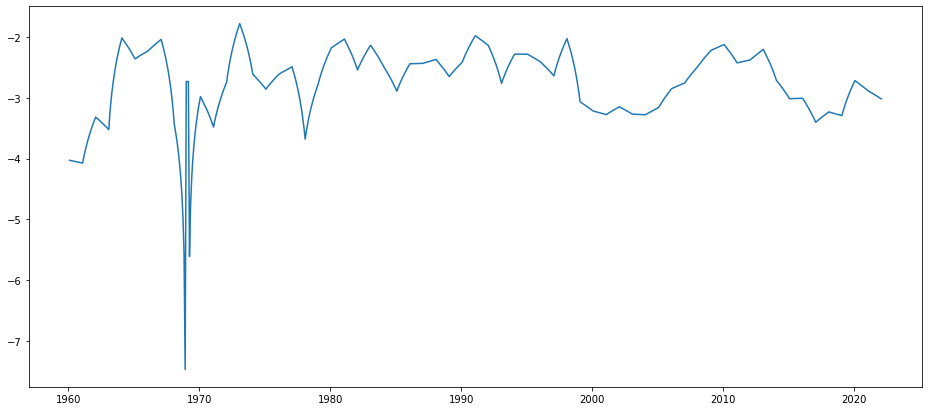

In [63]:
plt.plot(indexedDataset_logScale)
pylab.rcParams['figure.figsize'] = (9,5)

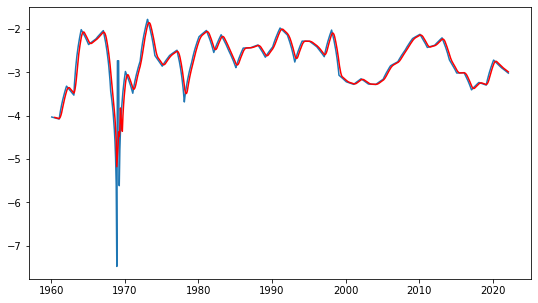

In [64]:
#The below transformation is required to make series stationary
movingAverage = indexedDataset_logScale.rolling(window=6).mean()
movingSTD = indexedDataset_logScale.rolling(window=6).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
pylab.rcParams['figure.figsize'] = (10,5)

In [65]:
movingAverage

,Rate
Year,
1960-01-31,NaN
1960-02-29,NaN
1960-03-31,NaN
1960-04-30,NaN
1960-05-31,NaN
...,...
2021-09-30,-2.941580
2021-10-31,-2.952695
2021-11-30,-2.963935


In [66]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Rate
Year,
1960-06-30,-0.009476
1960-07-31,-0.009512
1960-08-31,-0.009548
1960-09-30,-0.009585
1960-10-31,-0.009622
...,...
2021-09-30,-0.027835
2021-10-31,-0.028148
2021-11-30,-0.028469


In [67]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=6).mean()
    movingSTD = timeseries.rolling(window=6).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Rate'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

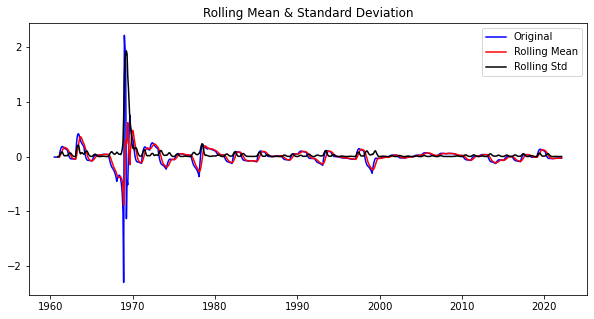

Results of Dickey Fuller Test:
Test Statistic                -8.173873e+00
p-value                        8.479300e-13
#Lags Used                     1.300000e+01
Number of Observations Used    7.260000e+02
Critical Value (1%)           -3.439389e+00
Critical Value (5%)           -2.865529e+00
Critical Value (10%)          -2.568894e+00
dtype: float64


In [68]:
test_stationarity(datasetLogScaleMinusMovingAverage)
pylab.rcParams['figure.figsize'] = (10,7)

As p-value is less, null hypothesis is rejected. So, it is stationary.

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this time series is very close to stationary.

## Exponential Decay Transformation   <a name="exp"></a>

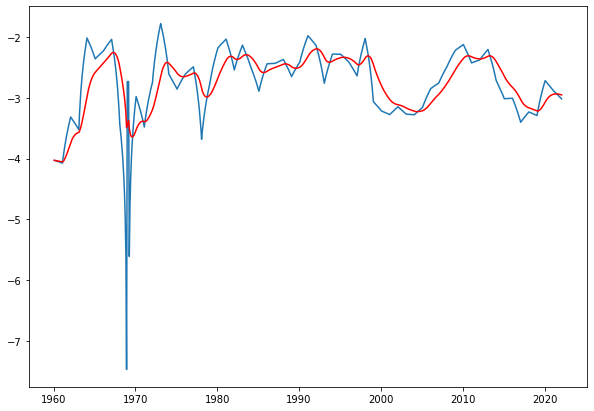

In [69]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
exponentialDecayWeightedAverage
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')
pylab.rcParams['figure.figsize'] = (12,8)

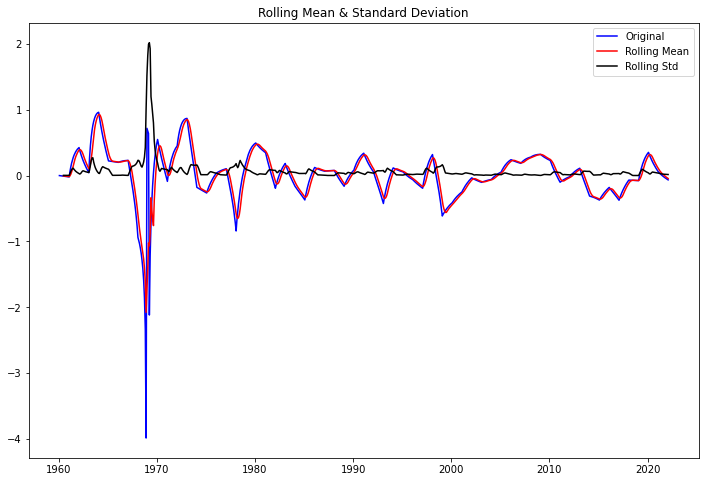

Results of Dickey Fuller Test:
Test Statistic                  -4.316238
p-value                          0.000416
#Lags Used                      18.000000
Number of Observations Used    726.000000
Critical Value (1%)             -3.439389
Critical Value (5%)             -2.865529
Critical Value (10%)            -2.568894
dtype: float64


In [70]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)
pylab.rcParams['figure.figsize'] = (12,8)

p-value of  0.000740 is good as 0.005 of exponential decay.

Test Statistic value not as close to the critical values as that for exponential decay.


We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.

## Time Shift Transformation  <a name="shift"></a>

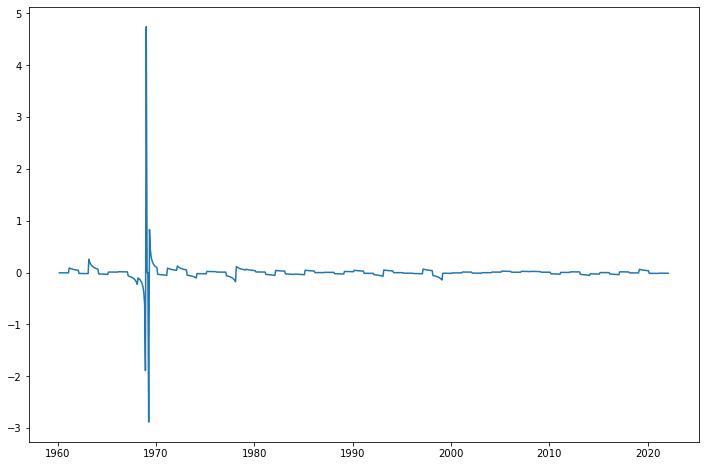

In [71]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
pylab.rcParams['figure.figsize'] = (10,7)

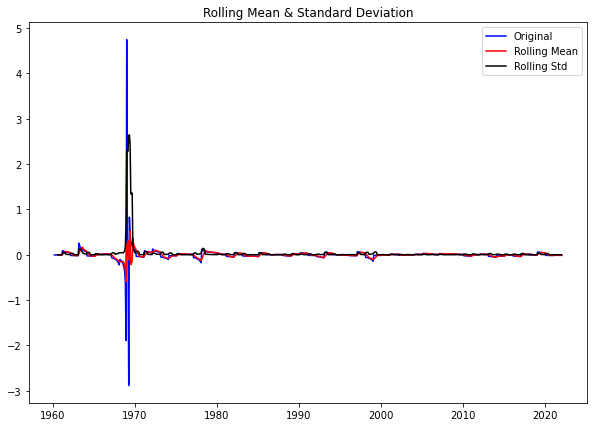

Results of Dickey Fuller Test:
Test Statistic                -8.267584e+00
p-value                        4.890886e-13
#Lags Used                     1.700000e+01
Number of Observations Used    7.260000e+02
Critical Value (1%)           -3.439389e+00
Critical Value (5%)           -2.865529e+00
Critical Value (10%)          -2.568894e+00
dtype: float64


In [72]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)
pylab.rcParams['figure.figsize'] = (10,7)

As p-value is less, null hypothesis is rejected. So, it is stationary.

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this time series is very close to stationary.


In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

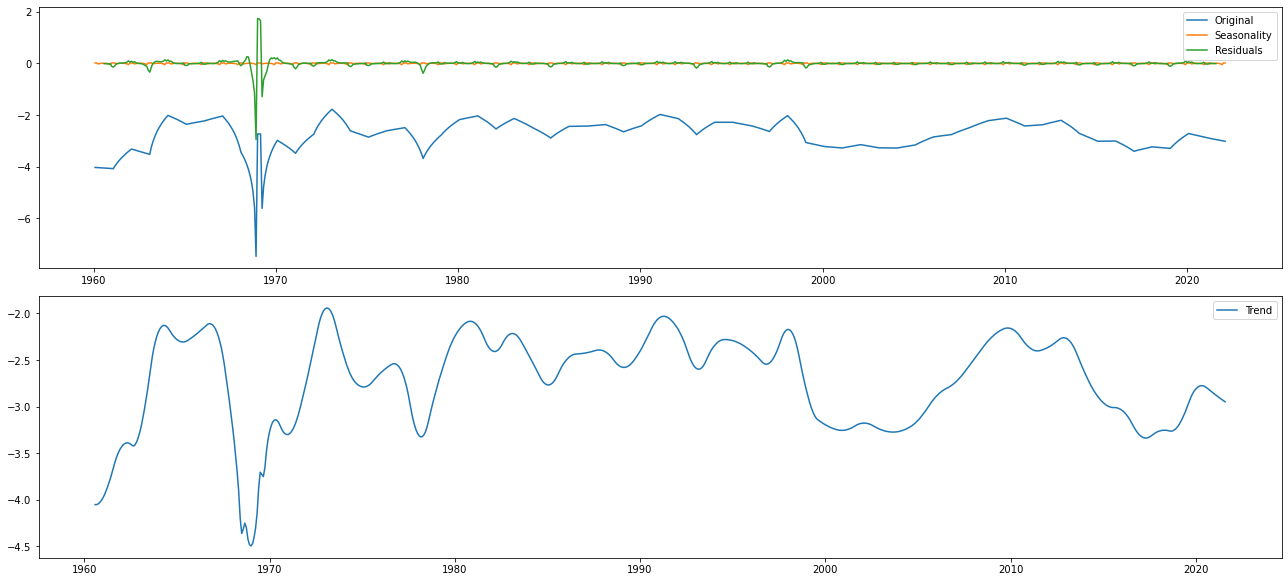

In [74]:
decomposition = seasonal_decompose(indexedDataset_logScale) 

import pylab

pylab.rcParams['figure.figsize'] = (18,16)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

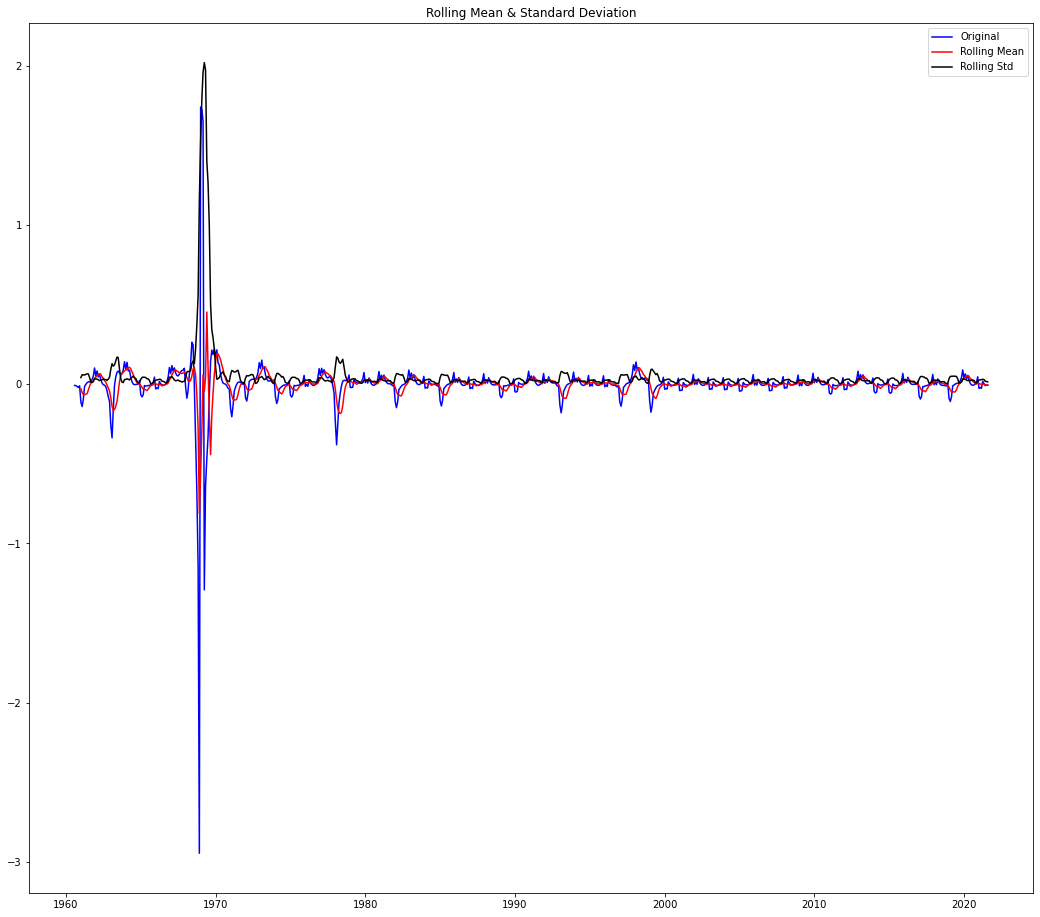

Results of Dickey Fuller Test:
Test Statistic                -9.906539e+00
p-value                        3.252210e-17
#Lags Used                     1.900000e+01
Number of Observations Used    7.130000e+02
Critical Value (1%)           -3.439555e+00
Critical Value (5%)           -2.865602e+00
Critical Value (10%)          -2.568933e+00
dtype: float64


In [75]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
decomposedLogData = pd.DataFrame(decomposedLogData)
decomposedLogData.columns = ["Rate"]
test_stationarity(decomposedLogData)
pylab.rcParams['figure.figsize'] = (10,6)

In [76]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

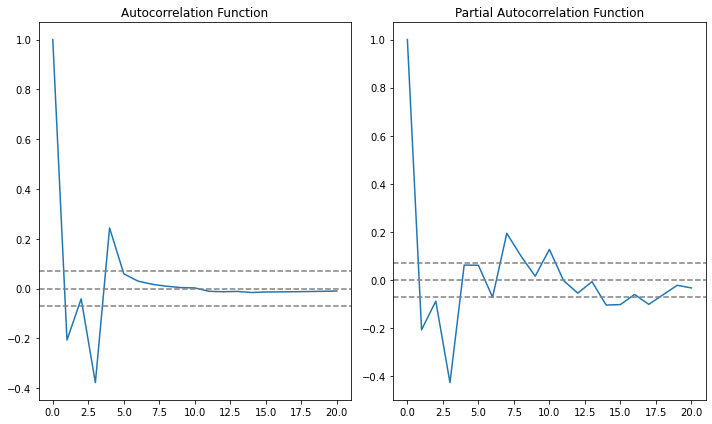

In [77]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2
From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

In [78]:
datasetLogDiffShifting


,Rate
Year,
1960-02-29,-0.003752
1960-03-31,-0.003766
1960-04-30,-0.003781
1960-05-31,-0.003795
1960-06-30,-0.003810
...,...
2021-09-30,-0.011300
2021-10-31,-0.011429
2021-11-30,-0.011561


In [79]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

Plotting AR model


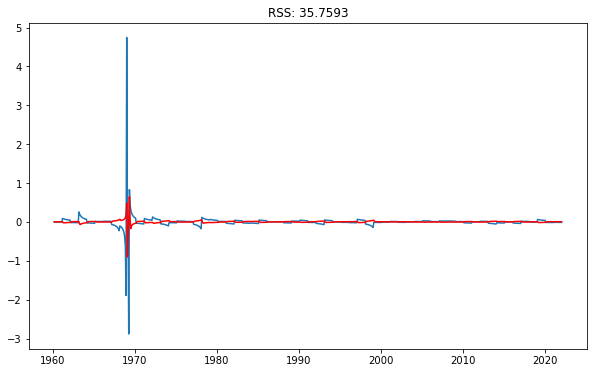

In [80]:
#AR Model(Autoregression)
#making order=(2,1,0) gives 
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Rate'])**2))
print('Plotting AR model')

In [81]:
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_AR_diff.head())

Year
1960-02-29    0.001369
1960-03-31    0.002428
1960-04-30    0.002972
1960-05-31    0.002977
1960-06-30    0.002981
Freq: M, dtype: float64


In [82]:
#Convert to cumulative sum
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print(predictions_AR_diff_cumsum)

Year
1960-02-29    0.001369
1960-03-31    0.003796
1960-04-30    0.006768
1960-05-31    0.009745
1960-06-30    0.012726
                ...   
2021-09-30    0.993064
2021-10-31    0.998380
2021-11-30    1.003737
2021-12-31    1.009136
2022-01-31    1.014576
Freq: M, Length: 744, dtype: float64


In [83]:
predictions_AR_log = pd.Series(indexedDataset_logScale['Rate'].iloc[0], index=indexedDataset_logScale.index)
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum, fill_value=0)
predictions_AR_log.head()

Year
1960-01-31   -4.028557
1960-02-29   -4.027188
1960-03-31   -4.024761
1960-04-30   -4.021789
1960-05-31   -4.018812
Freq: M, dtype: float64

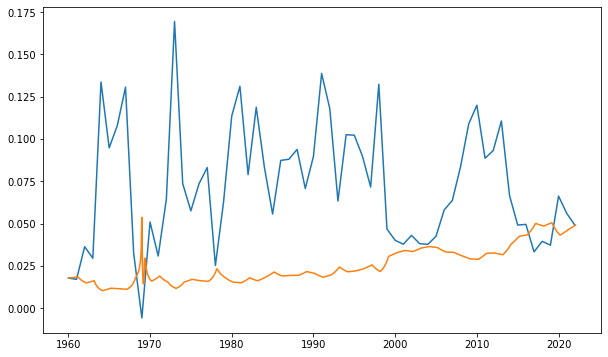

In [84]:
# Inverse of log is exp.
predictions_AR = np.exp(predictions_AR_log)
plt.plot(inflation_rate)
plt.plot(predictions_AR)

In [85]:
rmse_AR=rmse(predictions_AR,inflation_rate2['Rate'])
rmse_AR

0.06106529806564836

Plotting MA model


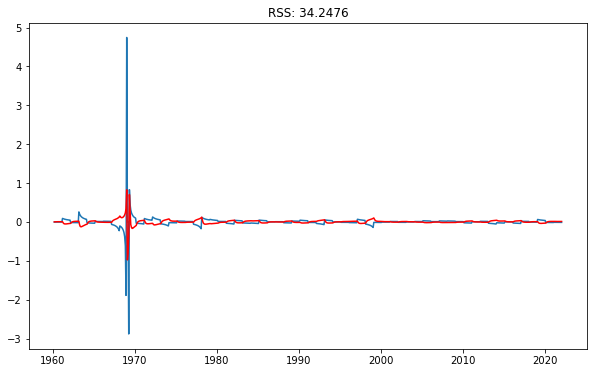

In [86]:
#MA Model(Moving Average)
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting['Rate'])**2))
print('Plotting MA model')

In [87]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Year
1960-02-29    0.001386
1960-03-31    0.002676
1960-04-30    0.003882
1960-05-31    0.004567
1960-06-30    0.005005
Freq: M, dtype: float64


In [88]:
#Convert to cumulative sum
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum)

Year
1960-02-29    0.001386
1960-03-31    0.004063
1960-04-30    0.007945
1960-05-31    0.012512
1960-06-30    0.017517
                ...   
2021-09-30    0.974188
2021-10-31    0.985714
2021-11-30    0.997325
2021-12-31    1.009033
2022-01-31    1.020842
Freq: M, Length: 744, dtype: float64


In [89]:
predictions_MA_log = pd.Series(indexedDataset_logScale['Rate'].iloc[0], index=indexedDataset_logScale.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum, fill_value=0)
predictions_MA_log.head()

Year
1960-01-31   -4.028557
1960-02-29   -4.027171
1960-03-31   -4.024494
1960-04-30   -4.020612
1960-05-31   -4.016045
Freq: M, dtype: float64

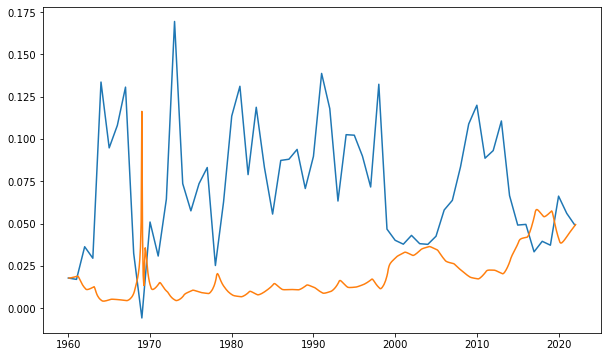

In [90]:
# Inverse of log is exp.
predictions_MA = np.exp(predictions_MA_log)
plt.plot(inflation_rate)
plt.plot(predictions_MA)

In [91]:
rmse_MA=rmse(predictions_MA,inflation_rate2['Rate'])
rmse_MA

0.0676971985075158

Plotting ARIMA model


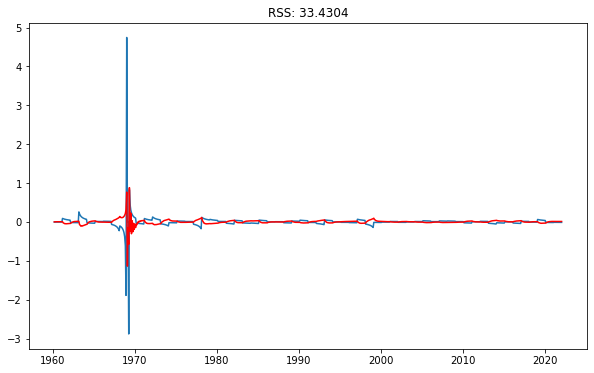

In [92]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Rate'])**2))
print('Plotting ARIMA model')

By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 59.6161 , indicating ARIMA to be better than its individual component models.

With the ARIMA model built, we will now generate predictions. But, before we do any plots for predictions ,we need to reconvert the predictions back to original form. This is because, our model was built on log transformed data.


## Prediction & Reverse transformations

In [93]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
1960-02-29    0.001392
1960-03-31    0.002885
1960-04-30    0.003237
1960-05-31    0.004232
1960-06-30    0.004342
Freq: M, dtype: float64


In [94]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Year
1960-02-29    0.001392
1960-03-31    0.004276
1960-04-30    0.007513
1960-05-31    0.011745
1960-06-30    0.016087
                ...   
2021-09-30    0.975532
2021-10-31    0.986952
2021-11-30    0.998405
2021-12-31    1.009948
2022-01-31    1.021560
Freq: M, Length: 744, dtype: float64


In [95]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Rate'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Year
1960-01-31   -4.028557
1960-02-29   -4.027165
1960-03-31   -4.024281
1960-04-30   -4.021043
1960-05-31   -4.016812
Freq: M, dtype: float64

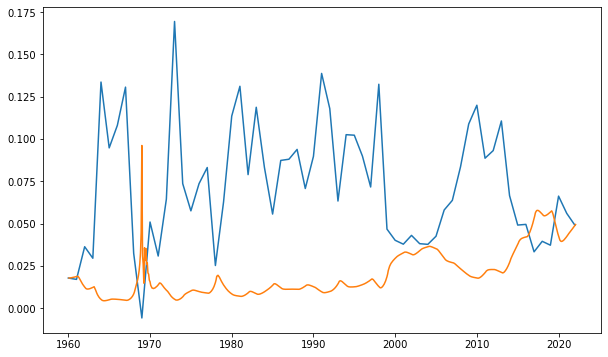

In [96]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(inflation_rate)
plt.plot(predictions_ARIMA)

We see that our predicted forecasts are very close to the real time series values indicating a fairly accurate model.

In [97]:
indexedDataset_logScale

,Rate
Year,
1960-01-31,-4.028557
1960-02-29,-4.032309
1960-03-31,-4.036076
1960-04-30,-4.039856
1960-05-31,-4.043651
...,...
2021-09-30,-2.969415
2021-10-31,-2.980844
2021-11-30,-2.992404


In [98]:
rmse_ARIMA=rmse(predictions_ARIMA,inflation_rate2['Rate'])
rmse_ARIMA

0.06744122925813364

In [99]:
#Compare the results
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","ses_model_rmse","hw_model_rmse","hwe_model_add_add_rmse","rmse_AR","rmse_MA","rmse_ARIMA"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,ses_model_rmse,hw_model_rmse,hwe_model_add_add_rmse,rmse_AR,rmse_MA,rmse_ARIMA])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,0.029793
1,rmse_Exp,0.031618
2,rmse_Quad,0.032876
3,rmse_add_sea,0.027009
4,rmse_add_sea_quad,0.032917
5,rmse_Mult_sea,0.024860
6,rmse_Mult_add_sea,0.031682
7,ses_model_rmse,0.056002
8,hw_model_rmse,0.143081
9,hwe_model_add_add_rmse,0.127241


We see that our predicted forecasts are very close to the real time series values indicating a fairly accurate model.so we will selecting AR(Autoregression_model).

In [100]:
indexedDataset_logScale

,Rate
Year,
1960-01-31,-4.028557
1960-02-29,-4.032309
1960-03-31,-4.036076
1960-04-30,-4.039856
1960-05-31,-4.043651
...,...
2021-09-30,-2.969415
2021-10-31,-2.980844
2021-11-30,-2.992404


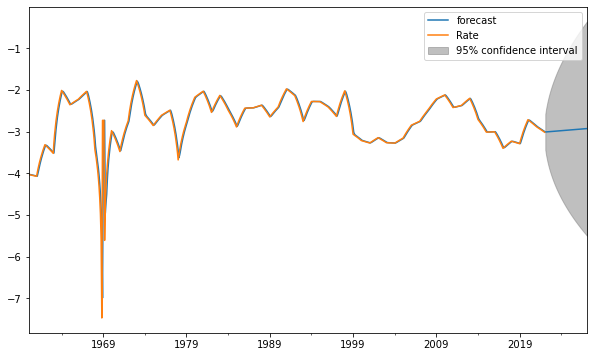

In [101]:
#final pridiction by AR(Autoregressiuon)
#We have 745(existing data of 12 yrs in months) data points. 
#And we want to forecast for additional 60 data points or 5 yrs.
results_AR.plot_predict(1,805)
pyplot.show()
#x=results_AR.forecast(steps=12)

### 